# WeRateDogs Wrangle and Analyze Data Project

## Gather

In [1]:
import numpy as np
import pandas as pd
import datetime
import requests
import os

#### Gather File #1: The WeRateDogs Twitter archive - provided through download and upload to project

In [2]:
twitter_weratedogs = pd.read_csv('twitter-archive-enhanced.csv')

#### Gather File #2: The tweet image predictions - breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. Read this file from udacity server through provided url

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_predict_file_name = url.split('/')[-1]
img_predict_file_name

'image-predictions.tsv'

In [4]:
## check file not loaded and saved locally before, if not load and save it, then read it into DataFrame 
if not os.path.isfile('img_predict.csv'):
    img_predict_req = requests.get(url)
    with open(img_predict_file_name,'wb') as imgf:
        imgf.write(img_predict_req.content)
    img_predict = pd.read_csv(img_predict_file_name,sep='\t')
    img_predict.to_csv('img_predict.csv',index=False)
else:
    img_predict = pd.read_csv('img_predict.csv')

#### Gather File #3: The tweet_json.txt file that required to get through programming and upload it to project. for safe of time will use file provided by udcity


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Check if file not saved before to get from twitter using tweepy.API
if not os.path.isfile('tweet-json.txt'):
    # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
    # These are hidden to comply with Twitter's API terms and conditions
    consumer_key = '**************'
    consumer_secret = '*************'
    access_token = '************'
    access_secret = '*************'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    tweet_ids = twitter_weratedogs.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet-json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [6]:
#import json
twitter_json = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])#,'url','media_url_https','full_text'])
idx = 0
with open('tweet-json.txt') as f:
    while(True):
        line = f.readline() 
        if not line:
            break
        jrec = json.loads(line)
        row = {'tweet_id':jrec['id']
               ,'retweet_count':jrec['retweet_count']
               ,'favorite_count':jrec['favorite_count']
                #'url':jline['entities']['media'][0]['url'],
                #'media_url_https':jline['entities']['media'][0]['media_url_https'],
                #'full_text':jline['full_text']             
               }
        twitter_json = twitter_json.append(row,ignore_index=True)

## Assess

In [7]:
twitter_weratedogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
293,837820167694528512,NaN,NaN,2017-03-04 00:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a pupper before and after being asked ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None
2201,668645506898350081,NaN,NaN,2015-11-23 04:21:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Incredibly rare dog here. Good at bipedalism. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668645506...,11,10,None,None,None,None,None
1602,685973236358713344,NaN,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,None,None,None,None
2228,668256321989451776,NaN,NaN,2015-11-22 02:34:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jareld. Jareld rules these waters. Lad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668256321...,13,10,Jareld,None,None,None,None


In [8]:
img_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
1017,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,2,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
1348,759557299618865152,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,golden_retriever,0.763333,True,Chesapeake_Bay_retriever,0.194251,True,Labrador_retriever,0.012225,True


In [9]:
twitter_weratedogs[~(twitter_weratedogs.retweeted_status_id.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [10]:
twitter_weratedogs[~(twitter_weratedogs.in_reply_to_status_id.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [11]:
twitter_json.sample(2)

,tweet_id,retweet_count,favorite_count
1512,691090071332753408,385,1867
932,753420520834629632,4071,8731


In [12]:
twitter_weratedogs[twitter_weratedogs.tweet_id==int('668960084974809088')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2190,668960084974809088,NaN,NaN,2015-11-24 01:11:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jaycob. He got scared of the vacuum. Hide...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668960084...,10,10,Jaycob,None,None,None,None


In [13]:
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [15]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
all_columns = pd.Series(list(twitter_weratedogs) + list(twitter_json) + list(img_predict))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

In [17]:
list(twitter_weratedogs)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [18]:
twitter_weratedogs.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_weratedogs[twitter_weratedogs['doggo'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
twitter_weratedogs['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
twitter_weratedogs['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
#view rating extracted values from text 

In [23]:
pd.set_option('display.max_colwidth', -1)
#refrence: https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin

In [24]:
#issue highlited by udacity review
#The rating_numerator column should of type float and also it should be correctly extracted. On assessing the twitter_enhanced.csv file you will see on row 46 that the correct rating in the tweet is 13.5 but it's extracted as 5. There are many more such issues in the dataset. So it should be extracted and cleaned correctly.
twitter_weratedogs.loc[45 , ['text','rating_numerator','rating_denominator']]

text                  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
rating_numerator      5                                                                                                                                       
rating_denominator    10                                                                                                                                      
Name: 45, dtype: object

In [25]:
twitter_weratedogs[twitter_weratedogs.text.str.contains(r"\d+\.\d*\/\d+")][['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [26]:
# check records with rating_denominator !=10
twitter_weratedogs[twitter_weratedogs.rating_denominator!=10][['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [27]:
#issue highlited by udacity review
#name if lower case it is not correct
twitter_weratedogs.loc[(twitter_weratedogs.name!=twitter_weratedogs.name.str.lower()) , ['name']].sample(5)

,name
479,Levi
1698,Aspen
2081,None
2214,None
1859,Reggie


In [28]:
twitter_weratedogs.loc[(twitter_weratedogs.name==twitter_weratedogs.name.str.lower()) , ['name']].sample(10)

,name
193,quite
1941,a
369,one
2350,a
2335,an
759,an
1527,the
1340,a
1361,a
2034,a


In [29]:
twitter_weratedogs['doggo'].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [30]:
twitter_weratedogs['floofer'].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [31]:
twitter_weratedogs['pupper'].value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [32]:
twitter_weratedogs['puppo'].value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [33]:
len(twitter_weratedogs[~twitter_weratedogs['retweeted_status_id'].isnull()])

181

In [34]:
twitter_weratedogs[(twitter_weratedogs['doggo']=='doggo')&(twitter_weratedogs['floofer']=='floofer')]
#+twitter_weratedogs['pupper']+twitter_weratedogs['puppo']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


In [35]:
len(twitter_weratedogs[(twitter_weratedogs['doggo']=='doggo')&(twitter_weratedogs['pupper']=='pupper')])

12

In [36]:
twitter_weratedogs[(twitter_weratedogs['doggo']=='doggo')&(twitter_weratedogs['puppo']=='puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


In [37]:
len(twitter_weratedogs[(twitter_weratedogs['floofer']=='floofer')&(twitter_weratedogs['pupper']=='pupper')])

0

In [38]:
len(twitter_weratedogs[(twitter_weratedogs['floofer']=='floofer')&(twitter_weratedogs['puppo']=='puppo')])

0

In [39]:
len(twitter_weratedogs[(twitter_weratedogs['pupper']=='pupper')&(twitter_weratedogs['puppo']=='puppo')])

0

In [40]:
len(twitter_weratedogs[(twitter_weratedogs['name']=='None')])

745

In [41]:
twitter_weratedogs[(twitter_weratedogs['name']=='None')].sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
89,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys please stop sending pictures without any dogs in th- oh never mind hello excuse me sir. 12/10 stealthy as h*ck https://t.co/brCQoqc8AW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/875021211251597312/photo/1,https://twitter.com/dog_rates/status/875021211251597312/photo/1",12,10,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None


In [42]:
# check twitter_weratedogs.tweet_id exists in twitter_json 
twitter_weratedogs[twitter_weratedogs.tweet_id.isin(twitter_json.tweet_id).astype(int)==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,"https://twitter.com/katieornah/status/771002130450743296/photo/1,https://twitter.com/katieornah/status/771002130450743296/photo/1",12,10,None,None,None,pupper,None


In [43]:
# check img-predict tweet_id exists in twitter_json 
img_predict[img_predict.tweet_id.isin(twitter_json.tweet_id).astype(int)==0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


In [44]:
# check img-predict tweet_id exists in twitter_weratedogs 
img_predict[img_predict.tweet_id.isin(twitter_weratedogs.tweet_id).astype(int)==0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [45]:
# check twitter_weratedogs tweet_id exists in img-predict 
twitter_weratedogs[twitter_weratedogs.tweet_id.isin(img_predict.tweet_id).astype(int)==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/883965650754039809,13,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,NaN,NaN,NaN,https://twitter.com/bbcworld/status/878599868507402241,13,10,None,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None


In [46]:
# check twitter_weratedogs tweet_id exists in img-predict 
len(twitter_weratedogs[(twitter_weratedogs.tweet_id.isin(img_predict.tweet_id).astype(int)==0 )
                  &(~twitter_weratedogs.in_reply_to_status_id.isnull() 
                   #|~twitter_weratedogs.retweeted_status_id.isnull()
                   )
                  ])

55

In [47]:
# check twitter_weratedogs tweet_id exists in img-predict 
len(twitter_weratedogs[(twitter_weratedogs.tweet_id.isin(img_predict.tweet_id).astype(int)==0 )
                  &(#~twitter_weratedogs.in_reply_to_status_id.isnull() 
                   ~twitter_weratedogs.retweeted_status_id.isnull()
                   )
                  ])

100

In [48]:
#Check ImagePredict that none of 3 prediction algorithms classification as breeds of dogs 
img_predict[(img_predict.p1_dog==False) & (img_predict.p2_dog==False) & (img_predict.p3_dog==False)].head()
#returned 324 rows with data as hn, cock, turtle,,,, even checking some images are not for dogs

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False


In [49]:
img_predict[(~((img_predict.p1_dog==False) & (img_predict.p2_dog==False) & (img_predict.p3_dog==False))) &
            (
                ((img_predict.img_num==1) & (img_predict.p1_dog==False)) | 
                ((img_predict.img_num==2) & (img_predict.p2_dog==False)) | 
                ((img_predict.img_num==3) & (img_predict.p3_dog==False))
            )
           ].head()
#even img_num is fetched based on highest algorithm conf ratio, but it must ignore alogrithms returned breed of dog flag as false, must consider image number of algorithm matched breeds of dogs with highest confidenance
# if all 3 algorithms retuned not breed of dogs, then no valid image 
#returned 523 rows

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False


#### Quality

##### `img_predict` DataFrame, there are 2075 rows    
- (1) `img_predict`: 324 records with none of 3 prediction algorithms classification as breeds of dogs. *Returned data as hen, cock, turtle,,,, even viewing some images seen not for dogs. These tweets must be removed*

- (2) `img_predict`: even `img_num` is fetched based on highest algorithm confidance ratio, but it must ignore alogrithms returned `breed of dogs flag` as `False`. *Must consider image number of algorithm matched breed of dogs with highest confidenance and at least one algorithm classified as breed of dogs. # of invalid records 203 (need to correct)*

- (3) `img_predict`: `p1`, `p2` and `p3` values has underscore and not in Title readable format

- (4) `img_predict`: `tweet_id` data type must be string and there are 2 records without `tweet_id` in `twitter_json`

##### `twitter_weratedogs` DataFrame, has 2356 rows
- (5)`twitter_weratedogs`: `tweet_id` data type must be string.
`timestamp` is `object` dtype - must be `datetime`. *validate tweets are not beyond August 1st, 2017*

- (6)`twitter_weratedogs`: `source` has 4 different values can be used in analysis/visualization. *better to remove href and keep value only

- (7)`twitter_weratedogs`: Extract ratings properly; the `rating_numerator` column should of type float and also it should be correctly extracted; for example row 46 that the correct rating in the tweet is 13.5 but it's extracted as 5. There are many more such issues in the dataset. So it should be extracted and cleaned correctly.
`rating_denominator` must be `10` o.w. incorrect.

- (8)`twitter_weratedogs`: some records with `retweeted_status_id` is not null or `in_reply_to_status_id` is not null. *as per assignment it is required to consider original ratings (no retweets)*

- (9)`twitter_weratedogs`: `puppo` is a stage between `pupper` to `doggo`. There is invalid case where it is `doggo` & `puppo`. 
-*hint: doggo & floofer  (1 case)  (floofer is valid for any stage)*

- (10)`twitter_weratedogs`: `pupper`(garou) cannot be `doggo` as is younger and unprepared for the responsibilites associated with being a doggo. *there are 12 mistaken rows with pupper and doggo*

- (11)`twitter_weratedogs`: `name` there are many more invalid names present, all start with lower case letters.

##### Other Notice
-`twitter_weratedogs`: `rating numerators` are greater than the `denominators`, *but this is not required in the assignment (as it requires advanced handling)* will calculate ratio and use it as refrence, high ratios will ommit


##### twitter_statcs Table, 2354 rows
- after cleaning ommit `tweet_id`s not in `twitter_weratedogs` and `img_predict` (keep only ids exist in the 3 DataFrames)

#### Tidiness
- (T1) In `twitter_weratedogs` DataFrame, some records with the four stage columns `doggo`, `floofer`, `pupper`, `puppo` all as `None`, try to predict stage from `text` column
- (T2) In `twitter_weratedogs` DataFrame, the four columns `doggo`, `floofer`, `pupper`, `puppo` must be merged into one column `stage`
- (T3) In `img_predict` DataFrame add column for name of most predict image `img_name` and drop predict columns as no more needed
- (T4)The 3 DataFrames must be merged into one DataFrame, with selected valid columns and only valid tweets as valid data & are breed of dogs

### Clean

In [50]:
twitter_weratedogs_clean = twitter_weratedogs.copy()
img_predict_clean = img_predict.copy()

In [51]:
twitter_json_clean = twitter_json.copy()

### Quality

(1) `img_predict`: 324 records with none of 3 prediction algorithms classification as breeds of dogs. *Returned data as hen, cock, turtle,,,, even viewing some images seen not for dogs. These tweets must be removed*

##### Define
Remove `img_predict` records with no prediction as breed of dogs  

##### Code

In [52]:
img_predict_clean = img_predict_clean[~(
                                        (img_predict_clean.p1_dog==False) & 
                                        (img_predict_clean.p2_dog==False) & 
                                        (img_predict_clean.p3_dog==False)
                                       )]

##### Test

In [53]:
assert(len(img_predict_clean[(img_predict_clean.p1_dog==False) & 
                              (img_predict_clean.p2_dog==False) & 
                              (img_predict_clean.p3_dog==False)])==0)

-----------------------------------------------------------------------------------------------------------------
(2) `img_predict`: even `img_num` is fetched based on highest algorithm confidance ratio, but it must ignore alogrithms returned breed of dogs flag `p1_dog` `p2_dog` `p3_dog` as `False`. *Must consider image number of algorithm matched breed of dogs with highest confidenance and at least one algorithm classified as breed of dogs.*

##### Define
re-calculate `img_num`  

##### Code

In [54]:
#img_predict_clean = img_predict.copy()
#img_predict_clean['p1_conf'] = img_predict_clean.p1_conf*img_predict_clean.p1_dog.astype(int) 
#img_predict_clean['p2_conf'] = img_predict_clean.p2_conf*img_predict_clean.p2_dog.astype(int) 
#img_predict_clean['p3_conf'] = img_predict_clean.p3_conf*img_predict_clean.p3_dog.astype(int)

img_predict_clean.loc[((img_predict_clean.img_num!=3)
                      &(img_predict_clean.p3_conf*img_predict_clean.p3_dog.astype(int)>img_predict_clean.p1_conf*img_predict_clean.p1_dog.astype(int))
                      &(img_predict_clean.p3_conf*img_predict_clean.p3_dog.astype(int)>img_predict_clean.p2_conf*img_predict_clean.p2_dog.astype(int))
                      )
                      , ['img_num']] = 3

img_predict_clean.loc[((img_predict_clean.img_num!=2)
                      &(img_predict_clean.p2_conf*img_predict_clean.p2_dog.astype(int)>img_predict_clean.p1_conf*img_predict_clean.p1_dog.astype(int))
                      &(img_predict_clean.p2_conf*img_predict_clean.p2_dog.astype(int)>img_predict_clean.p3_conf*img_predict_clean.p3_dog.astype(int))
                      )
                      , ['img_num']] = 2

img_predict_clean.loc[((img_predict_clean.img_num!=1)
                      &(img_predict_clean.p1_conf*img_predict_clean.p1_dog.astype(int)>img_predict_clean.p2_conf*img_predict_clean.p2_dog.astype(int))
                      &(img_predict_clean.p1_conf*img_predict_clean.p1_dog.astype(int)>img_predict_clean.p3_conf*img_predict_clean.p3_dog.astype(int))
                      )
                      , ['img_num']] = 1



##### Test

In [55]:
assert(len(img_predict_clean[((img_predict_clean.img_num==1)&(~img_predict_clean.p1_dog))
                            |((img_predict_clean.img_num==2)&(~img_predict_clean.p2_dog))
                            |((img_predict_clean.img_num==3)&(~img_predict_clean.p3_dog))
                            ]
          )==0
      )

-----------------------------------------------------------------------------------------------------------------
(3) `img_predict`: `p1`, `p2` and `p3` values has underscore and not in Title readable format

##### Define
Change `p1`, `p2`, `p3` values by replace `_` with ` ` and Title strings  

##### Code

In [56]:
img_predict_clean['p1'] = img_predict_clean.p1.str.replace('_',' ').str.title()
img_predict_clean['p2'] = img_predict_clean.p2.str.replace('_',' ').str.title()
img_predict_clean['p3'] = img_predict_clean.p3.str.replace('_',' ').str.title()

##### Test

In [57]:
img_predict_clean.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
792,690728923253055490,https://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg,1,Kuvasz,0.422806,True,Golden Retriever,0.291586,True,Great Pyrenees,0.076189,True
1927,857989990357356544,https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg,1,French Bulldog,0.432580,True,English Springer,0.325898,True,Lakeland Terrier,0.042618,True


-----------------------------------------------------------------------------------------------------------------
(4) `img_predict`: `tweet_id` data type must be string and there are 2 records without `tweet_id` in `twitter_json`

##### Define
Change dtype of `tweet_id` to string. 

Remove records in `img_predict` without `tweet_id` in `twitter_json`  

##### Code

In [58]:
img_predict_clean.tweet_id = img_predict_clean.tweet_id.astype(str)
twitter_json_clean.tweet_id = twitter_json_clean.tweet_id.astype(str)

In [59]:
img_predict_clean = img_predict_clean[~(img_predict_clean.tweet_id.isin(twitter_json_clean.tweet_id)==0)]

##### Test

In [60]:
img_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1750 non-null object
jpg_url     1750 non-null object
img_num     1750 non-null int64
p1          1750 non-null object
p1_conf     1750 non-null float64
p1_dog      1750 non-null bool
p2          1750 non-null object
p2_conf     1750 non-null float64
p2_dog      1750 non-null bool
p3          1750 non-null object
p3_conf     1750 non-null float64
p3_dog      1750 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.8+ KB


In [61]:
assert(len(img_predict_clean[(img_predict_clean.tweet_id.isin(twitter_json_clean.tweet_id)==0)])==0)

-----------------------------------------------------------------------------------------------------------------

(5)`twitter_weratedogs`: `tweet_id` data type must be string. 

`timestamp` is `object` dtype, must be `datetime`. *validate tweets are not beyond August 1st, 2017*

#### Define
Change dtype of `tweet_id` to string. 

Convert `timestamp` from `object` dtype to `datetime` dtype 

##### Code

In [62]:
twitter_weratedogs_clean.tweet_id = twitter_weratedogs_clean.tweet_id.astype(str)

In [63]:
#twitter_weratedogs_clean = twitter_weratedogs.copy()
twitter_weratedogs_clean['timestamp'] = pd.to_datetime(twitter_weratedogs_clean['timestamp'])# format='%d%b%Y:%H:%M:%S.%f'

#### Test

In [64]:
twitter_weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [65]:
#twitter_weratedogs_clean.info()
# check no date beyond 1 aug 2017
assert(len(twitter_weratedogs_clean[twitter_weratedogs_clean.timestamp>=datetime.datetime(2017, 8, 2)])==0)

----------------------------------------------------------------------------------------------------------------------
(6)`twitter_weratedogs`: `source` has 4 different values can be used in analysis/visualization. *better to remove href and keep value only

#### Define
Replace with short value (source text)

##### Code

In [66]:
#twitter_weratedogs_clean = twitter_weratedogs.copy()
twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.source=='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>')
                             , 'source'] = 'Twitter for iPhone'

twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.source=='<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>')
                             , 'source'] = 'Vine - Make a Scene'

twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.source=='<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>')
                             , 'source'] = 'Twitter Web Client'

twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.source=='<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>')
                             , 'source'] = 'TweetDeck'

#### Test

In [67]:
twitter_weratedogs_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

-------------------------------------------------------------------------------------------------------------
(7)`twitter_weratedogs`: Extract ratings properly; the `rating_numerator` column should of type float and also it should be correctly extracted; for example row 46 that the correct rating in the tweet is 13.5 but it's extracted as 5. There are many more such issues in the dataset. So it should be extracted and cleaned correctly. `rating_denominator` must be `10` o.w. incorrect.

#### Define
extract correct `rating_numerator`

remove records with `rating_denominator` != `10` and calculate `rating_ratio` 

##### Code

In [68]:
twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.text.str.contains(r"\d+\.\d*\/\d+")) ,'rating_numerator']=twitter_weratedogs_clean.text.str.extract(r"(\d+\.\d*)", expand=False).str.strip()

In [69]:
twitter_weratedogs_clean.rating_numerator = twitter_weratedogs_clean.rating_numerator.astype(float)
twitter_weratedogs_clean.rating_denominator = twitter_weratedogs_clean.rating_denominator.astype(float)

In [70]:
#remove records with invalid rating_denominator (i.e.!=10)
twitter_weratedogs_clean = twitter_weratedogs_clean[(twitter_weratedogs_clean.rating_denominator==10)]

In [71]:
twitter_weratedogs_clean['rating_ratio'] = twitter_weratedogs_clean.rating_numerator/twitter_weratedogs_clean.rating_denominator

##### Test

In [72]:
twitter_weratedogs_clean[twitter_weratedogs_clean.text.str.contains(r"\d+\.\d*\/\d+")][['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75,10.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [73]:
#assert(len(twitter_weratedogs_clean[(twitter_weratedogs_clean.rating_denominator!=10)])==0)

In [74]:
twitter_weratedogs_clean[(twitter_weratedogs_clean.rating_numerator>50) & (twitter_weratedogs_clean.rating_numerator>twitter_weratedogs_clean.rating_denominator)][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10.0
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10.0
290,@markhoppus 182/10,182.0,10.0
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0,10.0


In [75]:
twitter_weratedogs_clean.rating_ratio.value_counts()

1.200      558
1.100      463
1.000      461
1.300      351
0.900      156
0.800      102
1.400      54 
0.700      54 
0.500      35 
0.600      32 
0.300      19 
0.400      15 
0.200      9  
0.100      8  
0.975      2  
0.000      2  
1.500      2  
42.000     2  
1.350      1  
1.126      1  
1.127      1  
18.200     1  
66.600     1  
1.700      1  
0.950      1  
177.600    1  
Name: rating_ratio, dtype: int64

#### Define
based on above ratio observation, records with high ratio calculated values (177.6,42,7.5) must considered low quality and remove it

##### Code

In [76]:
#twitter_weratedogs_clean = twitter_weratedogs_clean[~(twitter_weratedogs_clean.rating_ratio>5)]

##### Test

In [77]:
#assert(len(twitter_weratedogs_clean[(twitter_weratedogs_clean.rating_ratio>5)])==0)

In [78]:
twitter_weratedogs_clean.rating_ratio.value_counts()

1.200      558
1.100      463
1.000      461
1.300      351
0.900      156
0.800      102
1.400      54 
0.700      54 
0.500      35 
0.600      32 
0.300      19 
0.400      15 
0.200      9  
0.100      8  
0.975      2  
0.000      2  
1.500      2  
42.000     2  
1.350      1  
1.126      1  
1.127      1  
18.200     1  
66.600     1  
1.700      1  
0.950      1  
177.600    1  
Name: rating_ratio, dtype: int64

-------------------------------------------------------------------------------------------------------------
(8)`twitter_weratedogs`: some records with `retweeted_status_id` is not null or `in_reply_to_status_id` is not null. *as per assignment it is required to consider original ratings (no retweets)*

#### Define
remove retweet records i.e. with both `retweeted_status_id` & `in_reply_to_status_id` are null

##### Code

In [79]:
twitter_weratedogs_clean = twitter_weratedogs_clean[(twitter_weratedogs_clean.in_reply_to_status_id.isnull()
                                                     &twitter_weratedogs_clean.retweeted_status_id.isnull())]

##### Test

In [80]:
assert(len(twitter_weratedogs_clean[~(twitter_weratedogs_clean.in_reply_to_status_id.isnull()
                                      &twitter_weratedogs_clean.retweeted_status_id.isnull())])==0)

-------------------------------------------------------------------------------------------------------------
(9)`twitter_weratedogs`: `puppo` is a stage between `pupper` to `doggo`. There is invalid case where it is `doggo` & `puppo`. 
-*hint: doggo & floofer  (1 case)  (floofer is valid for any stage)*

#### Define
check text first

In [81]:
#twitter_weratedogs_clean = twitter_weratedogs.copy()
twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='doggo')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='puppo')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('doggo')>=0)
                        &(twitter_weratedogs_clean.text.str.lower().str.find('puppo')>=0)
                         )].text

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object

based on text for this case, clean `doggo` stage and keep `puppo` stage 

##### Code

In [82]:
twitter_weratedogs_clean.loc[((twitter_weratedogs_clean.doggo=='doggo')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='puppo')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('doggo')>=0)
                        &(twitter_weratedogs_clean.text.str.lower().str.find('puppo')>=0)
                         ),'doggo']='None'

##### Test

In [83]:
assert(len(twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='doggo') 
                                     &(twitter_weratedogs_clean.puppo=='puppo'))])==0)

-------------------------------------------------------------------------------------------------------------
(10)`twitter_weratedogs`: `pupper`(garou) cannot be `doggo` as is younger and unprepared for the responsibilites associated with being a doggo. *there are 12 mistaken rows with pupper and doggo*

#### Define
check text first

In [84]:
#twitter_weratedogs_clean = twitter_weratedogs.copy()
twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='doggo')&(twitter_weratedogs_clean.pupper=='pupper')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('doggo')>=0)
                        &(twitter_weratedogs_clean.text.str.lower().str.find('pupper')>=0)
                         )].text

460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
575     This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                    
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
733     Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u                                                                                                          
889     Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https:

refrence for image display https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
`
from IPython.display import Image, display
listOfImageNames = ['/path/to/images/1.png',
                    '/path/to/images/2.png']
for imageName in listOfImageNames:
    display(Image(filename=imageName))`

In [85]:
from IPython.display import Image, display
df_pupperdoggo = twitter_weratedogs_clean[(
                         (twitter_weratedogs_clean.doggo=='doggo')&(twitter_weratedogs_clean.pupper=='pupper')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
#                        &(twitter_weratedogs_clean.text.str.lower().str.find('doggo')>=0)
#                        &(twitter_weratedogs_clean.text.str.lower().str.find('pupper')>=0)
                         )]

df_pupperdoggo = pd.merge(df_pupperdoggo, img_predict_clean,on=['tweet_id', 'tweet_id']).loc[:,['tweet_id','jpg_url', 'text']]
#df_pupperdoggo
for idx in df_pupperdoggo.index:
    print(df_pupperdoggo['text'][idx])
    print(df_pupperdoggo['tweet_id'][idx])
    display(Image(url=df_pupperdoggo['jpg_url'][idx], width=100, height=100))


This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
817777686764523521


Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
808106460588765185


This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
801115127852503040


Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
759793422261743616


Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
751583847268179968


This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
741067306818797568


Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
733109485275860992


Correct records based on seen image (2 images are pupper and 1 image to drop based on written text). 
Keep `doggo` & `pupper` for images has both


##### Code

In [86]:
twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.tweet_id=='817777686764523521'), 'doggo']='None'
twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.tweet_id=='801115127852503040'), 'doggo']='None'
twitter_weratedogs_clean = twitter_weratedogs_clean[~(twitter_weratedogs_clean.tweet_id=='751583847268179968')] 

#twitter_weratedogs_clean = twitter_weratedogs_clean[~((twitter_weratedogs_clean.doggo=='doggo') 
#                                                      &(twitter_weratedogs_clean.pupper=='pupper')
#                                                     )]

#twitter_weratedogs_clean[(twitter_weratedogs_clean.tweet_id=='801115127852503040')]


##### Test

In [87]:
len(twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='doggo') 
                                     &(twitter_weratedogs_clean.pupper=='pupper'))])

6

In [88]:
from IPython.display import Image, display
df_pupperdoggo = twitter_weratedogs_clean[(
                         (twitter_weratedogs_clean.doggo=='doggo')&(twitter_weratedogs_clean.pupper=='pupper')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
#                        &(twitter_weratedogs_clean.text.str.lower().str.find('doggo')>=0)
#                        &(twitter_weratedogs_clean.text.str.lower().str.find('pupper')>=0)
                         )]

df_pupperdoggo = pd.merge(df_pupperdoggo, img_predict_clean,on=['tweet_id', 'tweet_id']).loc[:,['tweet_id','jpg_url', 'text']]
#df_pupperdoggo
for idx in df_pupperdoggo.index:
    print(df_pupperdoggo['text'][idx])
    print(df_pupperdoggo['tweet_id'][idx])
    display(Image(url=df_pupperdoggo['jpg_url'][idx], width=100, height=100))


Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
808106460588765185


Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
759793422261743616


This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
741067306818797568


Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
733109485275860992


-------------------------------------------------------------------------------------------------------------
(11)`twitter_weratedogs`: `name` there are many more invalid names present, all start with lower case letters.

#### Define
Change incorrect names to `None`

In [89]:
twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.name==twitter_weratedogs_clean.name.str.lower()), 'name']='None'

##### Test

In [90]:
assert(len(twitter_weratedogs_clean[(twitter_weratedogs_clean.name==twitter_weratedogs_clean.name.str.lower())])==0)

--------------------------------------------------------------------------------------------------------------

##### twitter_statcs Table, 2354 rows
- after cleaning ommit `tweet_id`s not in `twitter_weratedogs` and `img_predict` (keep only ids exist in the 3 DataFrames)

In [91]:
len(twitter_json_clean)

2354

In [92]:
len(img_predict_clean)

1750

In [93]:
len(twitter_weratedogs_clean)

2079

##### Code

In [94]:
twitter_weratedogs_clean = twitter_weratedogs_clean[~(twitter_weratedogs_clean.tweet_id.isin(img_predict_clean.tweet_id)==0)]
img_predict_clean = img_predict_clean[~(img_predict_clean.tweet_id.isin(twitter_weratedogs_clean.tweet_id)==0)]
twitter_json_clean = twitter_json_clean[~(twitter_json_clean.tweet_id.isin(twitter_weratedogs_clean.tweet_id)==0)]

##### Test

In [95]:
len(twitter_json_clean)

1649

In [96]:
len(img_predict_clean)

1649

In [97]:
len(twitter_weratedogs_clean)

1649

In [98]:
assert(len(twitter_json_clean)==len(img_predict_clean)==len(twitter_weratedogs_clean))

--------------------------------------------------------------------------------------------------------------

### Tidiness

(T1) In `twitter_weratedogs` DataFrame, some records with the four stage columns `doggo`, `floofer`, `pupper`, `puppo` all as `None`, try to predict stage from `text` column

#### Define
for records with the four stage columns `doggo`, `floofer`, `pupper`, `puppo` all as `None`:
Find `puppo` in `text` if find it set `puppo` column value to `puppo`
then in remaining find `pupper` in `text` if find it set `pupper` column value to `pupper`
then in remaining find `doggo` in `text` if find it set `doggo` column value to `doggo`
then in remaining find `floofer` in `text` if find it set `floofer` column value to `floofer`

For records with both `floofer` and `doggo` are set, clean `doggo` as `floofer` is `doggo` as well 

#### Code

In [99]:
len_all_None =len(twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None'))])
len_all_None

1393

In [100]:
len(twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('puppo')>=0)
                         )])

5

In [101]:
len(twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('pupper')>=0)
                         )])

12

In [102]:
len(twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('doggo')>=0)
                         )])

4

In [103]:
len(twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('floofer')>=0)
                         )])

0

In [104]:
twitter_weratedogs_clean.loc[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('puppo')>=0)
                         ) , 'puppo']='puppo'

twitter_weratedogs_clean.loc[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('pupper')>=0)
                         ) , 'pupper']='pupper'

twitter_weratedogs_clean.loc[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('doggo')>=0)
                         ) , 'doggo']='doggo'

twitter_weratedogs_clean.loc[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('floofer')>=0)
                         ) , 'floofer']='floofer'

In [105]:
twitter_weratedogs_clean.loc[((twitter_weratedogs_clean.doggo=='doggo')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='floofer')&(twitter_weratedogs_clean.puppo=='None')
                        &(twitter_weratedogs_clean.text.str.lower().str.find('floofer')>=0)
                         ) , 'doggo']='None'

#### Test

In [106]:
len_all_None_after_find = len(twitter_weratedogs_clean[((twitter_weratedogs_clean.doggo=='None')&(twitter_weratedogs_clean.pupper=='None')
                        &(twitter_weratedogs_clean.floofer=='None')&(twitter_weratedogs_clean.puppo=='None'))])
len_all_None_after_find

1372

In [107]:
len_all_None - len_all_None_after_find

21

(T2) In `twitter_weratedogs` DataFrame, the four columns `doggo`, `floofer`, `pupper`, `puppo` must be merged into one column `stage`

#### Define
Define new column `stage` and set it based values in columns `doggo`, `floofer`, `pupper`, `puppo`
drop columns `doggo`, `floofer`, `pupper`, `puppo`

#### Code

In [108]:
twitter_weratedogs_clean['stage'] = twitter_weratedogs_clean['doggo'].replace('None','')+twitter_weratedogs_clean['pupper'].replace('None','')+twitter_weratedogs_clean['puppo'].replace('None','')+twitter_weratedogs_clean['floofer'].replace('None','')
twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.stage==''),'stage']='None'
drop_columns = ['doggo','floofer','pupper','puppo']
twitter_weratedogs_clean.drop(drop_columns, axis=1, inplace=True)

In [109]:
twitter_weratedogs_clean.loc[(twitter_weratedogs_clean.stage==''),'stage']='None'

#### Test

In [110]:
twitter_weratedogs_clean.stage.value_counts()

None           1372
pupper         180 
doggo          58  
puppo          27  
floofer        8   
doggopupper    4   
Name: stage, dtype: int64

In [111]:
twitter_weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 1 to 2355
Data columns (total 15 columns):
tweet_id                      1649 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1649 non-null datetime64[ns]
source                        1649 non-null object
text                          1649 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1649 non-null object
rating_numerator              1649 non-null float64
rating_denominator            1649 non-null float64
name                          1649 non-null object
rating_ratio                  1649 non-null float64
stage                         1649 non-null object
dtypes: datetime64[ns](1), float64(7), object(7)
memory usage: 206.1+ KB


--------------------------------------------------------------------------------------------------------------
(T3) In `img_predict` DataFrame add column for name of most predict image `img_name` and drop predict columns as no more needed

#### Define

`img_predict_clean` add column: `img_name` of validated `img_num`
`img_predict_clean` drop columns: `img_num` `p1` `p1_conf` `p1_dog` `p2` `p2_conf` `p2_dog` `p3` `p3_conf` `p3_dog`

In [112]:
img_predict_clean.loc[(img_predict_clean.img_num==1), 'img_name'] = img_predict_clean.p1
img_predict_clean.loc[(img_predict_clean.img_num==2), 'img_name'] = img_predict_clean.p2
img_predict_clean.loc[(img_predict_clean.img_num==3), 'img_name'] = img_predict_clean.p3

In [113]:
drop_columns = ['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
img_predict_clean.drop(drop_columns, axis=1, inplace=True)

#### Test

In [114]:
img_predict_clean.img_name.value_counts()

Golden Retriever                  153
Labrador Retriever                103
Pembroke                          94 
Chihuahua                         89 
Pug                               62 
Toy Poodle                        50 
Chow                              47 
Samoyed                           42 
Pomeranian                        41 
Malamute                          33 
Chesapeake Bay Retriever          31 
French Bulldog                    31 
Cocker Spaniel                    30 
Miniature Pinscher                24 
Eskimo Dog                        22 
Cardigan                          21 
German Shepherd                   21 
Shih-Tzu                          20 
Staffordshire Bullterrier         20 
Beagle                            20 
Siberian Husky                    19 
Maltese Dog                       18 
Rottweiler                        18 
Shetland Sheepdog                 18 
Kuvasz                            17 
Italian Greyhound                 17 
Basset      

In [115]:
img_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id    1649 non-null object
jpg_url     1649 non-null object
img_name    1649 non-null object
dtypes: object(3)
memory usage: 131.5+ KB


--------------------------------------------------------------------------------------------------------------
(T4)The 3 DataFrames must be merged into one DataFrame, with selected valid columns and only valid tweets as valid data & are breed of dogs

#### Define

`twitter_weratedogs_clean` drop columns: `in_reply_to_status_id` `in_reply_to_user_id` `retweeted_status_id` `retweeted_status_user_id` `retweeted_status_timestamp` `expanded_urls` `rating_numerator` `rating_denominator`

In [116]:
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator']
twitter_weratedogs_clean.drop(drop_columns, axis=1, inplace=True)

#### Test

In [117]:
twitter_weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 1 to 2355
Data columns (total 7 columns):
tweet_id        1649 non-null object
timestamp       1649 non-null datetime64[ns]
source          1649 non-null object
text            1649 non-null object
name            1649 non-null object
rating_ratio    1649 non-null float64
stage           1649 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 103.1+ KB


In [118]:
twitter_weratedogs_clean.describe()

,rating_ratio
count,1649.000000
mean,1.082825
std,0.177159
min,0.000000
25%,1.000000
50%,1.100000
75%,1.200000
max,1.400000


#### Define

Merge DataFrames into one valid and clean DataFrame

In [119]:
twitter_weratedogs_clean = pd.merge(twitter_weratedogs_clean,img_predict_clean,on=['tweet_id', 'tweet_id'])

In [120]:
twitter_weratedogs_clean = pd.merge(twitter_weratedogs_clean,twitter_json_clean,on=['tweet_id', 'tweet_id'])

#### Test

In [121]:
twitter_weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1648
Data columns (total 11 columns):
tweet_id          1649 non-null object
timestamp         1649 non-null datetime64[ns]
source            1649 non-null object
text              1649 non-null object
name              1649 non-null object
rating_ratio      1649 non-null float64
stage             1649 non-null object
jpg_url           1649 non-null object
img_name          1649 non-null object
retweet_count     1649 non-null object
favorite_count    1649 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 154.6+ KB


------------------------------------------------------------------------------------------------
End Cleaning, view result

In [122]:
twitter_weratedogs_clean

,tweet_id,timestamp,source,text,name,rating_ratio,stage,jpg_url,img_name,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,1.3,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,1.2,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,1.3,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,1.2,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,1.3,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay Retriever,3261,20562
5,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax,1.3,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,2158,12041
6,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,1.3,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,16716,56848
7,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,1.3,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish Terrier,4429,28226
8,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,1.4,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,7711,32467
9,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,Koda,1.3,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,7624,31166


In [123]:
twitter_weratedogs_clean.describe()

,rating_ratio
count,1649.000000
mean,1.082825
std,0.177159
min,0.000000
25%,1.000000
50%,1.100000
75%,1.200000
max,1.400000


In [124]:
twitter_weratedogs_clean.to_csv('twitter_archive_master.csv',index=False)

In [125]:
twitter_weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1648
Data columns (total 11 columns):
tweet_id          1649 non-null object
timestamp         1649 non-null datetime64[ns]
source            1649 non-null object
text              1649 non-null object
name              1649 non-null object
rating_ratio      1649 non-null float64
stage             1649 non-null object
jpg_url           1649 non-null object
img_name          1649 non-null object
retweet_count     1649 non-null object
favorite_count    1649 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 154.6+ KB


## Working on Cleaned Data for finding Insights and Visualization

In [126]:
import matplotlib.pyplot as plt
% matplotlib inline

In [127]:
# load datasets
twitter_master = pd.read_csv('twitter_archive_master.csv')

In [128]:
from IPython.display import Image, display
def print_df(df):
    for idx in df.index:
        if (df['name'][idx]!='None'):
            print('Name: {}'.format(df['name'][idx]))
        print(df['text'][idx])
        print('Tweet Id: {}'.format(df['tweet_id'][idx]))
        print('Stage: {}'.format(df['stage'][idx]))
        print('Favorited: {}, Retweeted: {}, Rated: {}'.format(df['favorite_count'][idx],df['retweet_count'][idx],df['rating_ratio'][idx]))
        print('Breed: {}'.format(df['img_name'][idx]))
        print('Image Url: {}'.format(df['jpg_url'][idx]))
        display(Image(url=df['jpg_url'][idx], width=200, height=200))

-------------------------------------------------------------------------------------------------------------

## Insight (1): 
The most favorited was a super supportive puppo was participated in the Toronto  #WomensMarch. https://t.co/nTz3FtorBc
,its breed: Lakeland Terrier.
<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg" width=400 height=400>

In [129]:
df_most_favorited = twitter_master.sort_values('favorite_count',ascending=False).head(2)
print_df(df_most_favorited)

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
Tweet Id: 822872901745569793
Stage: puppo
Favorited: 132810, Retweeted: 48265, Rated: 1.3
Breed: Lakeland Terrier
Image Url: https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg


Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Tweet Id: 744234799360020481
Stage: doggo
Favorited: 131075, Retweeted: 79515, Rated: 1.3
Breed: Labrador Retriever
Image Url: https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


-------------------------------------------------------------------------------------------------------------

## Insight (2): 
The most retweeted was dogoo where it can stand in a pool. https://t.co/7wE9LTEXC4
, its breed: Labrador Retriever. Also it was the second favorited.
<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg" width=300 height=300>

In [130]:
df_most_retweeted = twitter_master.sort_values('retweet_count',ascending=False).head(1)
print_df(df_most_retweeted)

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Tweet Id: 744234799360020481
Stage: doggo
Favorited: 131075, Retweeted: 79515, Rated: 1.3
Breed: Labrador Retriever
Image Url: https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


-------------------------------------------------------------------------------------------------------------

In [131]:
twitter_master.rating_ratio.value_counts()

1.200    421
1.000    358
1.100    352
1.300    221
0.900    131
0.800    68 
0.700    31 
1.400    21 
0.600    16 
0.500    12 
0.400    6  
0.300    5  
0.200    2  
1.127    1  
1.350    1  
0.975    1  
1.126    1  
0.000    1  
Name: rating_ratio, dtype: int64

In [132]:
twitter_master.sort_values('rating_ratio', ascending=False)['rating_ratio'].head(1)

508    1.4
Name: rating_ratio, dtype: float64

-------------------------------------------------------------------------------------------------------------

## Insight (3):
There are 21 tweets with hightest Rating Ratio as 1.4

In [133]:
df_most_rated = twitter_master[twitter_master.rating_ratio>=1.4]
print_df(df_most_rated)

Name: Cassie
This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A
Tweet Id: 890240255349198849
Stage: doggo
Favorited: 32467, Retweeted: 7711, Rated: 1.4
Breed: Pembroke
Image Url: https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg


I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC
Tweet Id: 884441805382717440
Stage: None
Favorited: 27478, Retweeted: 5856, Rated: 1.4
Breed: Pembroke
Image Url: https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg


Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Tweet Id: 881536004380872706
Stage: pupper
Favorited: 50199, Retweeted: 16570, Rated: 1.4
Breed: Samoyed
Image Url: https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg


Name: Emmy
This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe
Tweet Id: 878057613040115712
Stage: None
Favorited: 42876, Retweeted: 7181, Rated: 1.4
Breed: French Bulldog
Image Url: https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg


Name: Walter
This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF
Tweet Id: 868880397819494401
Stage: None
Favorited: 55098, Retweeted: 12518, Rated: 1.4
Breed: French Bulldog
Image Url: https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg


Name: Cermet
This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. Watered every day so they can grow. 14/10 for all https://t.co/GUefqUmZv8
Tweet Id: 856282028240666624
Stage: None
Favorited: 29086, Retweeted: 6841, Rated: 1.4
Breed: Chihuahua
Image Url: https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg


Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR
Tweet Id: 854120357044912130
Stage: pupper
Favorited: 33911, Retweeted: 8285, Rated: 1.4
Breed: Black-And-Tan Coonhound
Image Url: https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg


Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL
Tweet Id: 841439858740625411
Stage: doggo
Favorited: 13755, Retweeted: 4168, Rated: 1.4
Breed: Labrador Retriever
Image Url: https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg


Name: Smiley
Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz
Tweet Id: 832273440279240704
Stage: doggo
Favorited: 12385, Retweeted: 2673, Rated: 1.4
Breed: Pembroke
Image Url: https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg


Name: Kuyu
Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved https://t.co/l38R6IZNNg
Tweet Id: 831911600680497154
Stage: None
Favorited: 30380, Retweeted: 7458, Rated: 1.4
Breed: Bloodhound
Image Url: https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg


Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
Tweet Id: 828650029636317184
Stage: None
Favorited: 10467, Retweeted: 1544, Rated: 1.4
Breed: Golden Retriever
Image Url: https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg


Name: Doobert
Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9
Tweet Id: 828381636999917570
Stage: doggo
Favorited: 13864, Retweeted: 2554, Rated: 1.4
Breed: Bedlington Terrier
Image Url: https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg


Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1
Tweet Id: 825535076884762624
Stage: puppo
Favorited: 56413, Retweeted: 19669, Rated: 1.4
Breed: Rottweiler
Image Url: https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg


Name: Gabe
This is Gabe. He was the unequivocal embodiment of a dream meme, but also one h*ck of a pupper. You will be missed by so many. 14/10 RIP https://t.co/M3hZGadUuO
Tweet Id: 822462944365645825
Stage: pupper
Favorited: 31800, Retweeted: 17209, Rated: 1.4
Breed: Pomeranian
Image Url: https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg


Name: Sundance
This is Sundance. He's a doggo drummer. Even sings a bit on the side. 14/10 entertained af (vid by @sweetsundance) https://t.co/Xn5AQtiqzG
Tweet Id: 821407182352777218
Stage: doggo
Favorited: 13075, Retweeted: 5053, Rated: 1.4
Breed: Irish Setter
Image Url: https://pbs.twimg.com/ext_tw_video_thumb/821407155391725568/pu/img/AJC07gFJDDBuwNTD.jpg


We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10

https://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE
Tweet Id: 820314633777061888
Stage: None
Favorited: 3706, Retweeted: 648, Rated: 1.4
Breed: Gordon Setter
Image Url: https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg


Name: Bo
This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
Tweet Id: 819004803107983360
Stage: doggo
Favorited: 95450, Retweeted: 42228, Rated: 1.4
Breed: Standard Poodle
Image Url: https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg


Name: Gary
Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg
Tweet Id: 813812741911748608
Stage: None
Favorited: 40402, Retweeted: 16267, Rated: 1.4
Breed: French Bulldog
Image Url: https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg


Name: Ollie
This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie https://t.co/qTRY2qX9y4
Tweet Id: 807621403335917568
Stage: pupper
Favorited: 16236, Retweeted: 4288, Rated: 1.4
Breed: Golden Retriever
Image Url: https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg


RIP Loki. Thank you for the good times. You will be missed by many. 14/10 https://t.co/gJKD9pst5A
Tweet Id: 778408200802557953
Stage: None
Favorited: 15135, Retweeted: 5023, Rated: 1.4
Breed: Pembroke
Image Url: https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg


I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS https://t.co/7oQ1wpfxIH
Tweet Id: 774314403806253056
Stage: None
Favorited: 24167, Retweeted: 6478, Rated: 1.4
Breed: Eskimo Dog
Image Url: https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg


In [134]:
#df_most_rated['img_tag'] = '<td><img src="'+ df_most_rated.jpg_url+'" width=300 height=300></td>'
#print(df_most_rated.img_tag.to_string(index=False))

-------------------------------------------------------------------------------------------------------------

#### This tweet 810984652412424192 https://t.co/LouL5vdvxx	 was for sam, smily 24/7 in previous work before cleaning wrong rating_denominator it was the most rated, which was invalid insight as actually there was no rating available for it.

-------------------------------------------------------------------------------------------------------------

In [135]:
twitter_master.img_name.value_counts().head(5)

Golden Retriever      153
Labrador Retriever    103
Pembroke              94 
Chihuahua             89 
Pug                   62 
Name: img_name, dtype: int64

In [136]:
df_none_stage = twitter_master[(twitter_master.stage=='None')].sort_values('favorite_count',ascending=False).sample(5)
print_df(df_none_stage)

Name: Marley
This is Marley. She's having a ruff day. Pretty pupset. 12/10 would assist https://t.co/yLm7hQ6UXh
Tweet Id: 802952499103731712
Stage: None
Favorited: 10085, Retweeted: 2336, Rated: 1.2
Breed: Chow
Image Url: https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg


These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10 https://t.co/RJvUjgGH5z
Tweet Id: 696894894812565505
Stage: None
Favorited: 2594, Retweeted: 758, Rated: 0.9
Breed: Appenzeller
Image Url: https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg


Name: Bailey
Meet Bailey. She plays with her food. Very childish. Doesn't even need a battle helmet smh. Still cute though. 9/10 https://t.co/CLEOjxhTEx
Tweet Id: 674436901579923456
Stage: None
Favorited: 1198, Retweeted: 426, Rated: 0.9
Breed: Shih-Tzu
Image Url: https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg


Name: Gizmo
This is Gizmo. His favorite thing is standing pupright like a hooman. Sneaky tongue slip status achieved. 13/10 would boop well https://t.co/IoR3n1fiiQ
Tweet Id: 869227993411051520
Stage: None
Favorited: 21112, Retweeted: 4023, Rated: 1.3
Breed: Pembroke
Image Url: https://pbs.twimg.com/media/DBAePiVXcAAqHSR.jpg


Name: Sarge
Meet Sarge. His parents signed him up for dancing lessons but his true passion is roller coasters 11/10 very petable https://t.co/KvVoBIgkje
Tweet Id: 681281657291280384
Stage: None
Favorited: 3520, Retweeted: 1258, Rated: 1.1
Breed: Saint Bernard
Image Url: https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg


In [137]:
df_most_favorited_golden_ret = twitter_master.query('img_name=="Golden Retriever"').sort_values('favorite_count',ascending=False).head(3)
print_df(df_most_favorited_golden_ret)

Name: Zoey
This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm
Tweet Id: 870374049280663552
Stage: None
Favorited: 85011, Retweeted: 27680, Rated: 1.3
Breed: Golden Retriever
Image Url: https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg


Elder doggo does a splash. Both 13/10 incredible stuff https://t.co/gBUDjdEcqz
Tweet Id: 795464331001561088
Stage: doggo
Favorited: 55683, Retweeted: 27728, Rated: 1.3
Breed: Golden Retriever
Image Url: https://pbs.twimg.com/ext_tw_video_thumb/795464066940764160/pu/img/jPkMMQXdydb7CqFX.jpg


Name: Barney
This is Barney. He's an elder doggo. Hitches a ride when he gets tired. Waves goodbye before he leaves. 13/10 please come back soon https://t.co/cFAasDXauK
Tweet Id: 846514051647705089
Stage: doggo
Favorited: 48410, Retweeted: 13076, Rated: 1.3
Breed: Golden Retriever
Image Url: https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg


In [138]:
df_most_rated = twitter_master.query('img_name=="Labrador Retriever"').sort_values('rating_ratio',ascending=False).head(3)
print_df(df_most_rated)

Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL
Tweet Id: 841439858740625411
Stage: doggo
Favorited: 13755, Retweeted: 4168, Rated: 1.4
Breed: Labrador Retriever
Image Url: https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg


Name: Darla
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
Tweet Id: 891689557279858688
Stage: None
Favorited: 42908, Retweeted: 8964, Rated: 1.3
Breed: Labrador Retriever
Image Url: https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg


Name: Trooper
Meet Trooper. He picks pup recyclables that have blown out of bins in the neighborhood and puts them back. 13/10 environmentally savvy af https://t.co/BqSttrTuIl
Tweet Id: 859851578198683649
Stage: None
Favorited: 16105, Retweeted: 3780, Rated: 1.3
Breed: Labrador Retriever
Image Url: https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg


-------------------------------------------------------------------------------------------------------------

## Insight (4): 
4 tweets were for pupper with related dogo together.
<table>
  <tr>
    <td><img src="https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg" height=300></td>
    <td><img src="https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg" height=300></td>
    <td><img src="https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg" height=300></td>
    <td><img src="https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg" height=300></td>
  </tr>
</table>

In [139]:
df_doggopupper = twitter_master[(twitter_master.stage=='doggopupper')]
print_df(df_doggopupper)

Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Tweet Id: 808106460588765185
Stage: doggopupper
Favorited: 9701, Retweeted: 2525, Rated: 1.2
Breed: Golden Retriever
Image Url: https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg


Name: Maggie
Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
Tweet Id: 759793422261743616
Stage: doggopupper
Favorited: 6620, Retweeted: 2173, Rated: 1.2
Breed: Golden Retriever
Image Url: https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg


This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
Tweet Id: 741067306818797568
Stage: doggopupper
Favorited: 10342, Retweeted: 3520, Rated: 1.2
Breed: Golden Retriever
Image Url: https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg


Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
Tweet Id: 733109485275860992
Stage: doggopupper
Favorited: 44619, Retweeted: 17621, Rated: 1.2
Breed: Golden Retriever
Image Url: https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg


-------------------------------------------------------------------------------------------------------------

## Insight (5): 
Most Tweets posted from iphone devices

In [140]:
twitter_master.source.value_counts()

Twitter for iPhone    1618
Twitter Web Client    22  
TweetDeck             9   
Name: source, dtype: int64

-------------------------------------------------------------------------------------------------------------

## Visualization Work

In [141]:
twitter_master.groupby('stage').rating_ratio.mean()

stage
None           1.074289
doggo          1.186207
doggopupper    1.200000
floofer        1.187500
pupper         1.088072
puppo          1.211111
Name: rating_ratio, dtype: float64

In [142]:
twitter_master.groupby('stage').favorite_count.sum()

stage
None           12111809
doggo          1080109 
doggopupper    71282   
floofer        109611  
pupper         1375422 
puppo          616517  
Name: favorite_count, dtype: int64

In [143]:
df_plt=twitter_master[['stage','rating_ratio','retweet_count','favorite_count']].query('stage not in["None"]').groupby('stage').sum()
df_plt['rating_percent']=100*df_plt['rating_ratio']/df_plt['rating_ratio'].sum()
df_plt['retweet_percent']=100*df_plt['retweet_count']/df_plt['retweet_count'].sum()
df_plt['favorite_percent']=100*df_plt['favorite_count']/df_plt['favorite_count'].sum()
df_plt

,rating_ratio,retweet_count,favorite_count,rating_percent,retweet_percent,favorite_percent
stage,,,,,,
doggo,68.800,392005,1080109,22.075834,36.527730,33.204076
doggopupper,4.800,25839,71282,1.540174,2.407724,2.191309
floofer,9.500,38214,109611,3.048262,3.560849,3.369597
pupper,195.853,435341,1375422,62.843290,40.565856,42.282415
puppo,32.700,181772,616517,10.492439,16.937841,18.952603


In [144]:
df_plt.drop(['rating_ratio', 'retweet_count','favorite_count'], axis='columns', inplace=True)

In [145]:
df_plt

,rating_percent,retweet_percent,favorite_percent
stage,,,
doggo,22.075834,36.527730,33.204076
doggopupper,1.540174,2.407724,2.191309
floofer,3.048262,3.560849,3.369597
pupper,62.843290,40.565856,42.282415
puppo,10.492439,16.937841,18.952603


## Insight (6) - Visualization: 
pupper was most rated, retweeted, favorited than doggo. doggo was more rated, retweeted, favorited than puppo

Text(0,0.5,'Percentage%')

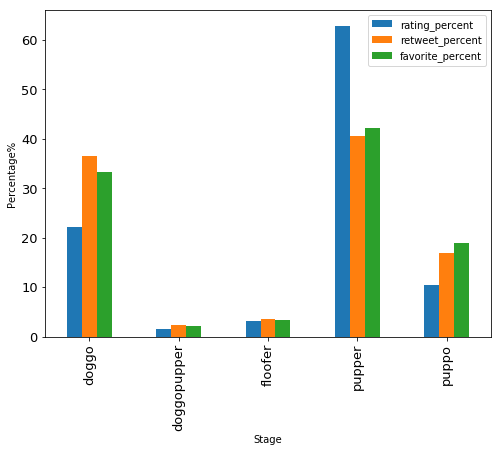

In [146]:
plt = df_plt.plot(kind="bar", figsize=(8, 6), fontsize=13)
plt.set_xlabel('Stage')
plt.set_ylabel('Percentage%')

In [147]:
fig = plt.get_figure()
fig.savefig('wrangle_plot.jpg', bbox_inches = 'tight')